<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Stack_Overflow_logo.svg"></img>


## Stack Overflow 2020 Developer Survey 
### Analyzed data based on the CRISP-DM
- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Business Understanding</a>  
- <a href='#4'>Data Understanding</a> 
- <a href='#5'>Data Preparation</a>  
- <a href='#6'>Evaluate the Results</a>


To get general Stack Overflow 2020 Developer insight, will be analyzed based on the CRISP-DM. The subprocesses of the CRISP-DM are written below.

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

## <a id="1">Introduction</a> 

Every year, Stack Overflow asks the developer community about everything from their favorite technologies to their job preferences. This year marks the tenth year that Stack Overflow has released the results of its annual developer survey - With nearly 65,000 responses fielded from over 180 countries and dependent territories, our 2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

This year, they covered some new topics ranging from artificial intelligence to programming ethics. They also found that underrepresented groups in the tech industry responded to our survey at lower rates than we'd expect from their participation in the workforce.

## <a id="2">Load packages</a>

In [1]:
#import python libraries and packages
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100


## <a id="3">Business Understanding</a>

The Business Understanding phase focuses on understanding the objectives and requirements of the project.I'll make a plan for the past going forward. By asking the following questions
Questions
>
 - What are best job description for developers in the survey result?
 - What are countries where most of the developers live ?
 - What is primary area of study for developers?
 - How important is formal education, such as a college degree in computers, to your career?
 - What is the most job description for developers?
 - How important is DevOps practice to expanding software development?
 - What is the basic operating system that most developers work on?
 - What platforms work have developers been developing intensively on?
 - What are the programming, scripting and coding languages of choice?
 


## <a id="4">Data Understanding</a>

In [2]:
# load in the dataset into a pandas dataframe and view sample data
data_df = pd.read_csv("./survey_results_public.csv")
schema_df = pd.read_csv("./survey_results_schema.csv")

### Check the data


Let's check the dataset rows and columns number.

In [3]:
print("Stack Overflow 2020 Developer Survey data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Stack Overflow 2020 Developer Survey data -  rows: 64461  columns: 61


In [4]:
print("Stack Overflow 2020 Developer Survey schema -  rows:",schema_df.shape[0]," columns:", schema_df.shape[1])

Stack Overflow 2020 Developer Survey schema -  rows: 61  columns: 2


### Glimpse the data

We start by looking to the data features (first 5 rows).

In [5]:
data_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional developmen

In [6]:
schema_df

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [7]:
#Test the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D


### Check missing data

Let's check if there is any missing data.

In [8]:
# check columns with no missing values
set(data_df.isna().sum()[data_df.isna().sum()==0].keys())

{'Respondent'}

### Data analyze

In [9]:
data_df.isnull().sum()

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

###  Visualize Data

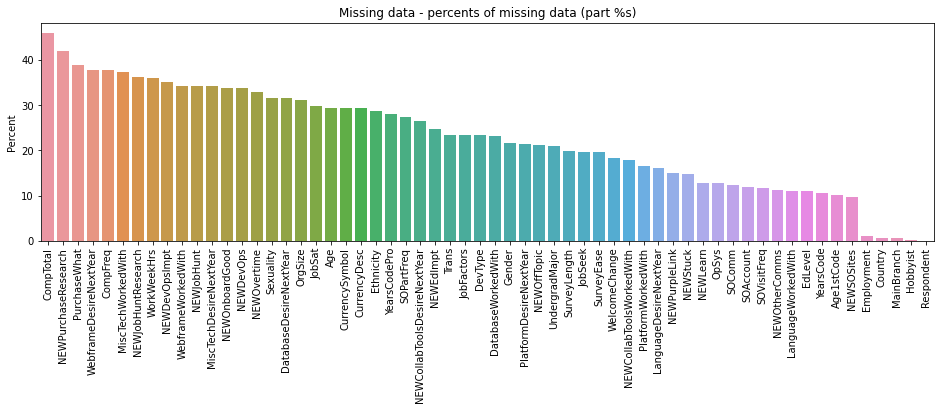

In [10]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def plot_missing_data(start, end):
    tmp1 = tmp[start:end]
    plt.figure(figsize = (16,4))
    plt.title('Missing data - percents of missing data (part %s)')
    s = sns.barplot(x=tmp1.index,y=tmp1['Percent'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()    
    

plot_missing_data(1,61)

Most of the respondents answered to questions: MainBranch, Hobbyist ,  Age1stCode, Age and Employment .All respondents answered the questions OpenSource and Hobby.

More than 50% of the respondents did not filled the CompTotal; 45% of responses miss NEWPurchaseResearch.

One can notice that the group questions have a very close ratio of answers; About 30% are missing, missing answers vary between 15% to 40% Most of the questions were not answered

##  <a id="5">Data Preparation</a>

- MainBranch : Best job description for developers in the survey
- Hobbyist : I will be working on figuring out whether software is a hobby for developers
- Country : The countries where most of the developers live
- UndergradMajor :Primary area of study for developers?
- NEWEdImpt : How important is formal education, such as a college degree in computers, to your career?
- DevType : What is the most job description for developers?
- NEWDevOpsImpt : How important is DevOps practice to expanding software development?
- OpSys : What is the basic operating system that most developers work on?
- PlatformWorkedWith : The platforms that have been extensive development work during the past year, and which of them do you want to work during the next year?
- LanguageWorkedWith : What are the programming, scripting and coding languages that you did intensive development work over the past year and which ones do you want to work on during the next year?

Check and play around the dataframes loaded before to get some idea or to get the business quesations progressed.


##  <a id="6">Evaluate the Results</a>

In this step I will analyze the columns prepared in advance and display the results

### Q1: MainBranch : what are best job description for developers in the survey result?

In [11]:
data_df['MainBranch'].unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

###  Analyze data

In [12]:
MainBranch_vals = data_df.MainBranch.value_counts()#Provide a pandas series of the counts for each MainBranch status

MainBranch_vals # assure this looks right

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

## Writing functions for Repetitive Tasks
### Univariate Exploration

###  Analyze data

In [13]:
def plot_stats(feature, text,size=2):
    '''
    INPUT:
    feature - the pandas dataframe you want to search and the column name you want to look through
    text - the string the title of your plot
    size - The size title in the plot 
    
    OUTPUT:
       bar chart showing the total count for per dimension of interest
    '''
    temp = data_df[feature].dropna().value_counts().head(50)
    df1 = pd.DataFrame({feature: temp.index,'Number of respondents': temp.values})
    plt.figure(figsize = (14,8))
    plt.title(text,fontsize=14)
    s = sns.barplot(x=feature,y='Number of respondents', data=df1 )
    s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize = 12)
    plt.show()   
    


###  Visualize Data

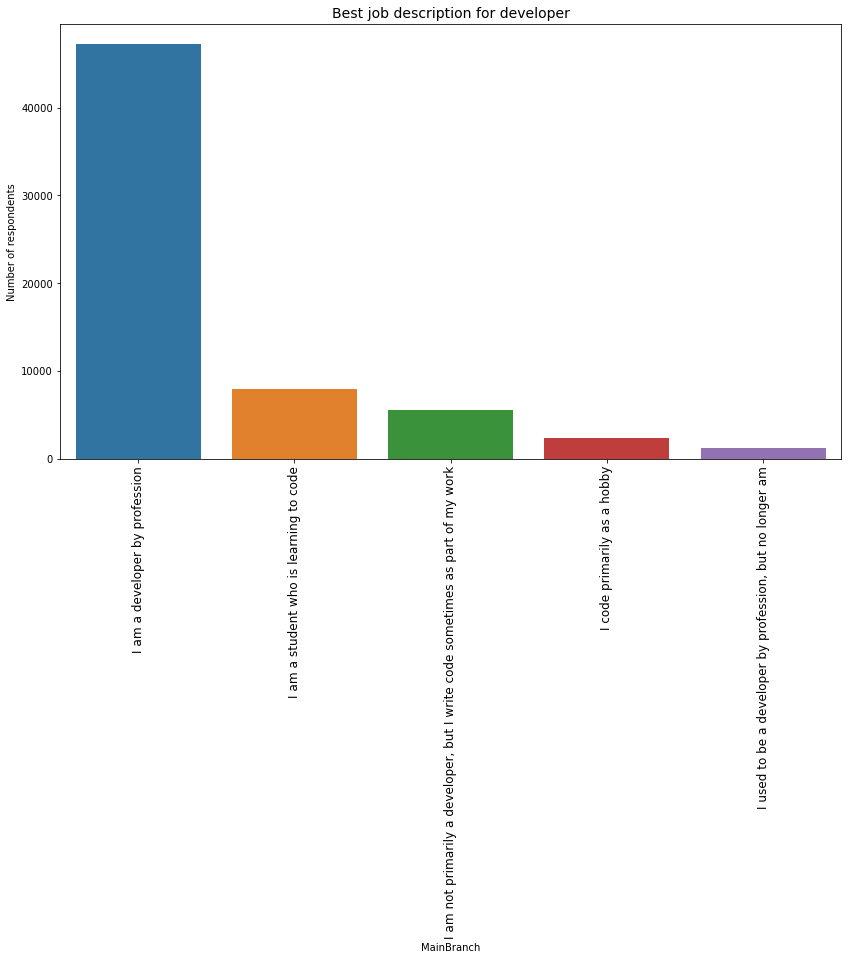

In [14]:
plot_stats('MainBranch','Best job description for developer')

When we look at the job description of the developers, we find that most of the results in the survey work for a job "I am a developer by profession"

### Q2: Hobbyist : I will be working on figuring out whether software is a hobby for developers

###  Analyze data

In [15]:
Hobbyist_vals = data_df.Hobbyist.value_counts()#Provide a pandas series of the counts for each Hobbyist status

Hobbyist_vals # assure this looks right

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

###  Visualize Data

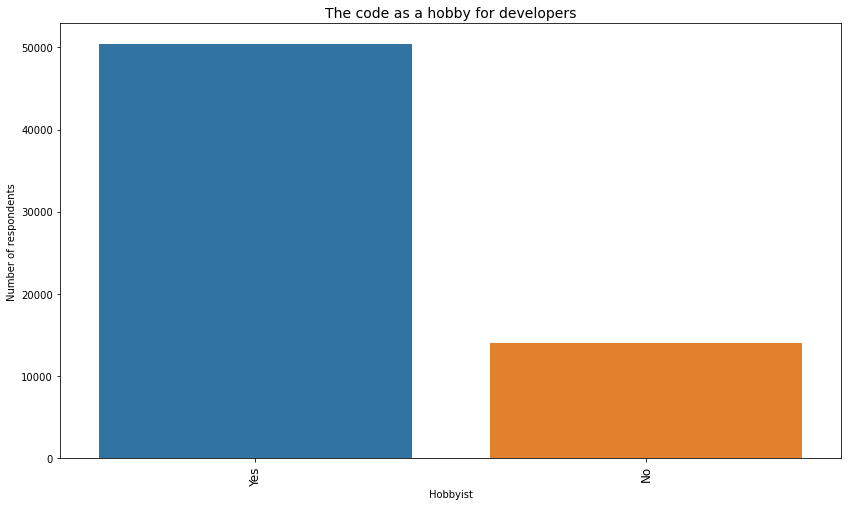

In [16]:
plot_stats('Hobbyist','The code as a hobby for developers')

Most of the developers in the survey result answered yes to the fact that learning development programs, as well as the need of most sectors for development programs and applications

### Q3 Country : The countries where most of the developers live

###  Analyze data

In [17]:
Country_dev_vals = data_df.Country.value_counts()#Provide a pandas series of the counts for each Hobbyist status

Country_dev_vals[:50] # assure this looks right

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Turkey                  777
Israel                  653
Switzerland             629
Bangladesh              609
Romania                 604
Nigeria                 593
Mexico                  540
Ukraine                 539
Austria                 539
Czech Republic          500
Indonesia               499
South Africa            494
Iran                    491
Belgium                 459
Ireland                 444
Philippines             405
Denmark                 397
Argentina               395
Greece                  390
Portugal                388
Norway              

###  Visualize Data

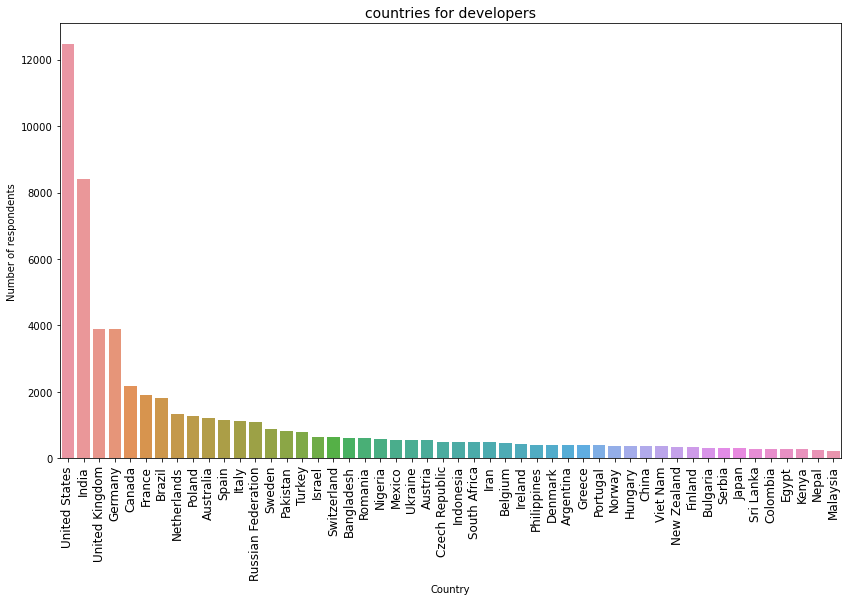

In [18]:
plot_stats('Country','countries for developers')

Most respondents are from United States (12469), followed by India (8403), Germany (3890) and United Kingdom (3896).

### Q3: UndergradMajor :Primary area of study for developers?

###  Analyze data

In [19]:
UndergradMajor_vals = data_df.UndergradMajor.value_counts()#Provide a pandas series of the counts for each UndergradMajor status

UndergradMajor_vals # assure this looks right

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

###  Visualize Data

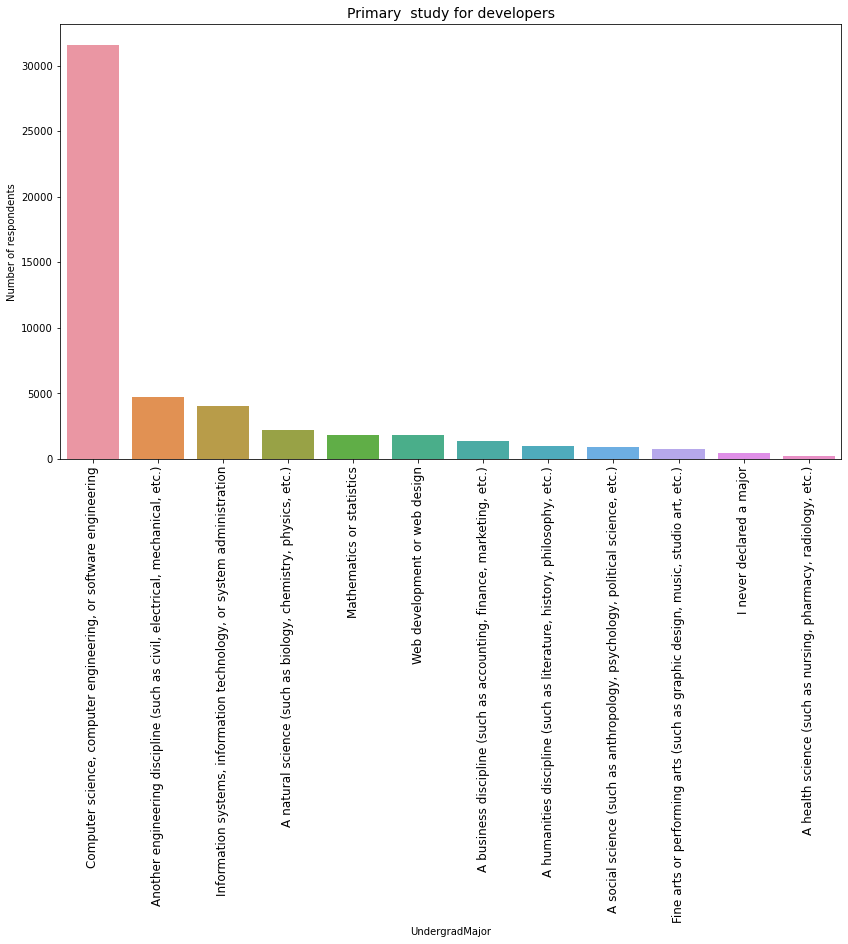

In [20]:
plot_stats('UndergradMajor','Primary  study for developers')

The large majority of respondents (more than 31K) graduated with a Major in Computer science, computer engineering, or software engineering. Next two categories, with less than 4K, are Another engineering discipline and Information systems, information technology, or system administration.
There are a variety of academic paths to becoming a professional software developer. Of the respondents that write code professionally and studied at the university level, over 62% have a degree in computer science, computer engineering, or software engineering and just under 10% have a degree in another engineering field. Interestingly enough, almost 10% of the respondents have a business related degree or a degree in a humanities, social science, or fine arts field of study.

### Q5: NEWEdImpt : How important is formal education, such as a college degree in computers, to your career?

###  Analyze data

In [21]:
NEWEdImpt_vals = data_df.NEWEdImpt.value_counts()#Provide a pandas series of the counts for each NEWEdImpt  status

NEWEdImpt_vals # assure this looks right

Fairly important                      12674
Very important                        11866
Somewhat important                    11388
Not at all important/not necessary     7785
Critically important                   4752
Name: NEWEdImpt, dtype: int64

###  Visualize Data

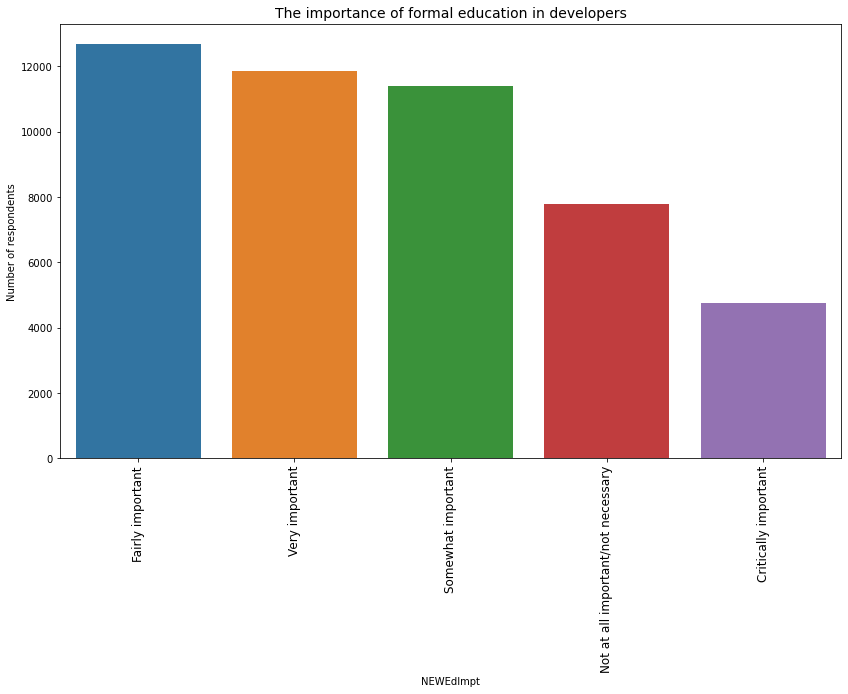

In [22]:
plot_stats('NEWEdImpt','The importance of formal education in developers')

Almost 85% of the respondents that are professional developers feel that formal education is at least somewhat important, which is contrary to the popular idiom that you don't need formal education to become a developer. However, almost 16% believe that it is not at all important or necessary.

### Q6 : DevType : What is the most job description for developers?

###  Analyze data

In [23]:
DevType_vals = data_df.DevType.value_counts()#Provide a pandas series of the counts for each NEWEdImpt  status

DevType_vals[:20] # assure this looks right

Developer, full-stack                                                                                           4424
Developer, back-end                                                                                             3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                  2227
Developer, back-end;Developer, full-stack                                                                       1476
Developer, front-end                                                                                            1401
Developer, mobile                                                                                               1251
Developer, front-end;Developer, full-stack                                                                       830
Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack     813
Developer, back-end;Developer, desktop or enterprise application

###  Visualize Data

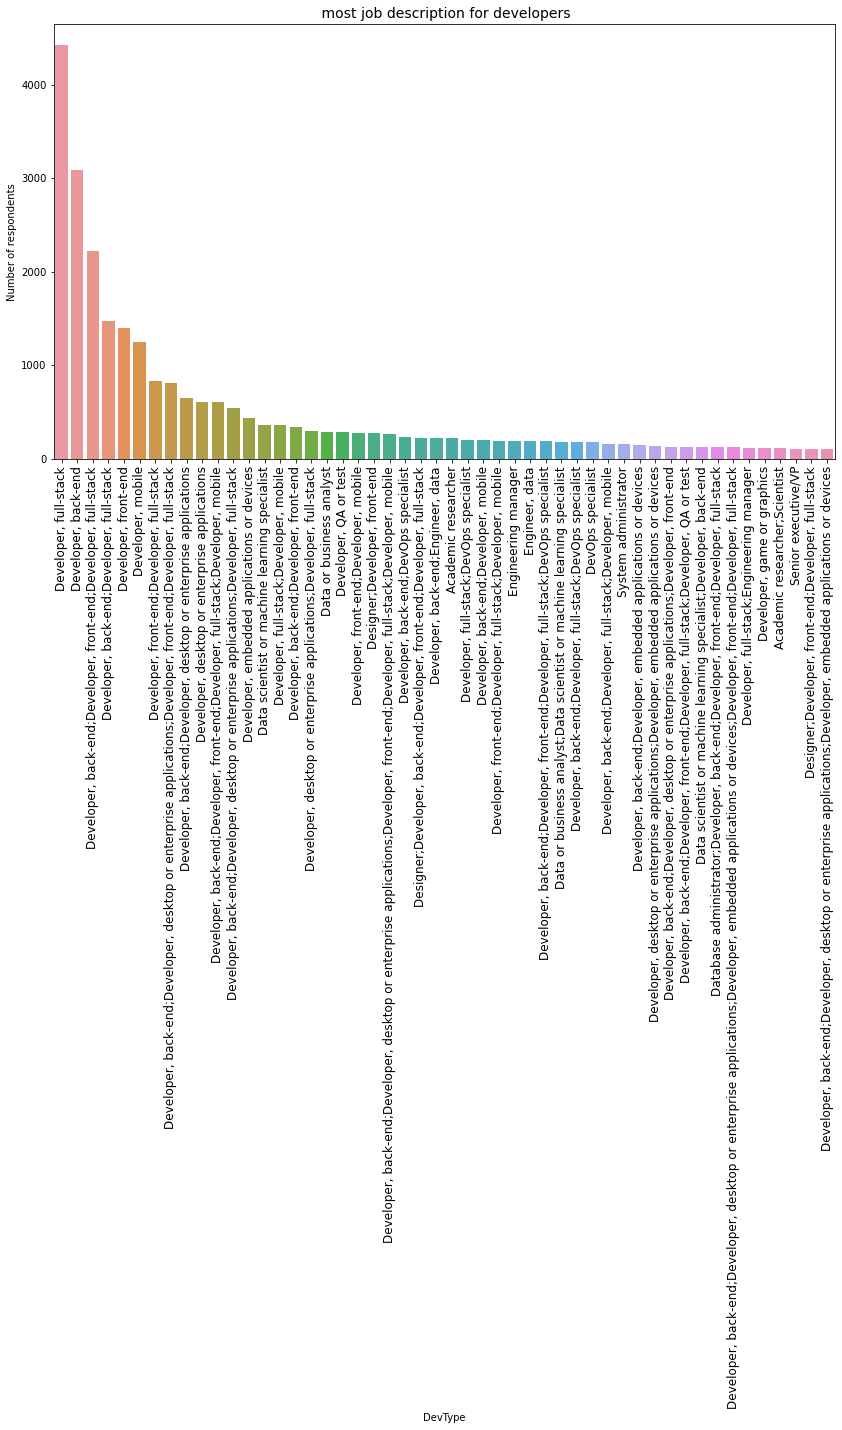

In [24]:
plot_stats('DevType',' most job description for developers')

Over 4424 declares they are Full-stack developer, followed with 3086 Back-end developer, 2227 Back-end developer, Front-end developer, Full-stack developer and 1401 Mobile developer, Although it's satisfying to knwo the most popular developers Type, this alone does not help in knowing the most job description for developers. So, we are going to take a slightly different root.

###  Analyze data

In [25]:
DevType_possible_vals = ['Academic researcher','Data or business analyst','Data scientist or machine learning specialist',
                 'Developer, back-end','Designer','Developer, desktop or enterprise applications','Developer, embedded applications or devices',
                 'Developer, front-end','Developer, full-stack', 'Developer, game or graphics','Developer, mobile','Developer, QA or test',
                 'DevOps specialist','Educator','Engineer, data','Engineer, site reliability','Engineering manager','Marketing or sales professional',
                 'Product manager','Scientist','Senior Executive (C-Suite, VP, etc.)','System administrator','Other']

In [26]:
from collections import defaultdict
def total_count(data_df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(data_df.shape[0]):
            #if the ed type is in the row add 1
            if val in data_df[col1][idx]:
                new_df[val] += int(data_df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


###  Analyze data

In [27]:
study_DevType = data_df['DevType'].value_counts().reset_index()
study_DevType.rename(columns={'index': 'DevType', 'DevType': 'count'}, inplace=True)
study_df_DevType = total_count(study_DevType, 'DevType', 'count', DevType_possible_vals)
study_df_DevType['prec'] = study_df_DevType['count']/np.sum(study_df_DevType['count'])
study_df_DevType

,DevType,count,prec
3,"Developer, back-end",27228,0.181457
8,"Developer, full-stack",27125,0.180771
7,"Developer, front-end",18296,0.121931
5,"Developer, desktop or enterprise applications",11784,0.078533
10,"Developer, mobile",9482,0.063191
12,DevOps specialist,5969,0.039780
4,Designer,5321,0.035461
20,System administrator,5242,0.034935
6,"Developer, embedded applications or devices",4750,0.031656
1,Data or business analyst,4024,0.026817


###  Visualize Data

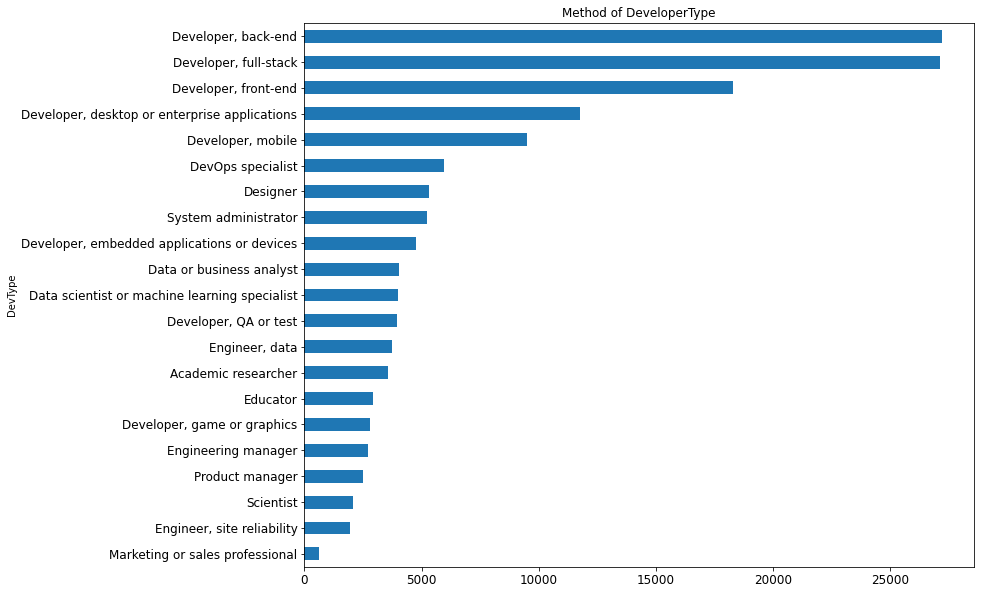

In [28]:
def clean_and_plot(data_df, title='Method of DeveloperType', plot=True):
    '''
    INPUT 
        df - a dataframe holding the DeveloperType column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study_DevType = data_df['DevType'].value_counts().reset_index()
    study_DevType.rename(columns={'index': 'DevType', 'DevType': 'count'}, inplace=True)
    study_df_DevType = total_count(study_DevType, 'DevType', 'count', DevType_possible_vals)

    study_df_DevType.set_index('DevType', inplace=True)
    if plot:
        study_df_DevType.sort_values('count',ascending=True,inplace=True)
        study_df_DevType.plot(kind='barh',figsize = (12,10),fontsize=12,legend=None);
        plt.title(title);
        plt.show()
    return study_df_DevType
    
props_df = clean_and_plot(data_df)

The comprehensive development should aim to develop an understanding of the technical basis, work logic and user experience, and of course it never stops learning and growth, and it continues to increase in all areas and through the survey we find that there are three job descriptions close to the list of other developers 'Developer, back-end','Developer, full-stack' and 'Developer, front-end'

### Q7: NEWDevOpsImpt : How important is DevOps practice to expanding software development?

###  Analyze data

In [29]:
data_df['NEWDevOpsImpt'].unique()

array(['Somewhat important', nan, 'Extremely important', 'Neutral',
       'Not at all important', 'Not very important'], dtype=object)

In [30]:
NEWDevOpsImpt_vals = data_df.NEWDevOpsImpt.value_counts()#Provide a pandas series of the counts for each NEWDevOpsImpt  status

NEWDevOpsImpt_vals # assure this looks right

Extremely important     20093
Somewhat important      12934
Neutral                  7274
Not very important        831
Not at all important      600
Name: NEWDevOpsImpt, dtype: int64

###  Visualize Data

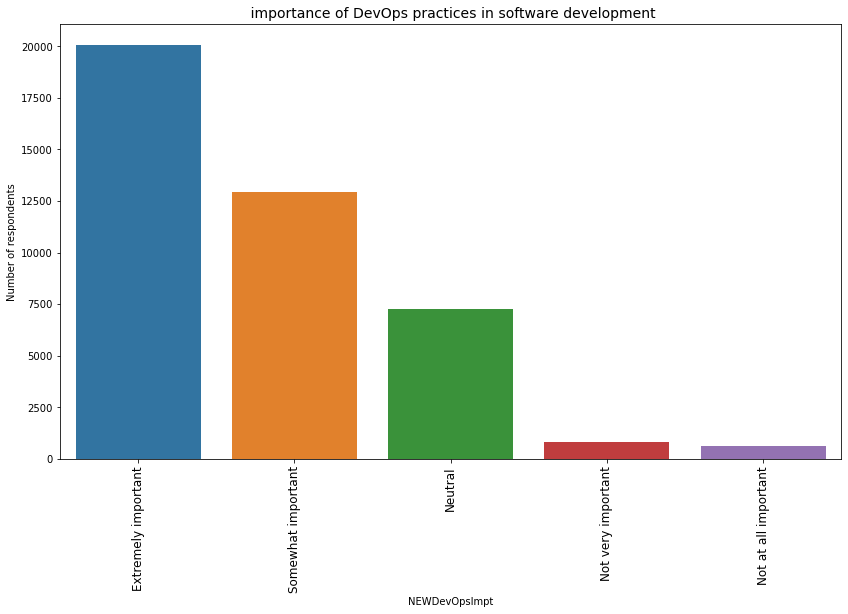

In [31]:
plot_stats('NEWDevOpsImpt',' importance of DevOps practices in software development')

The importance of DevOps to scaling software development. Almost 80% of respondents believed that DevOps is at least somewhat important, with almost half of the respondents noting that it is extremely important.


### Q8 : OpSys : What is the basic operating system that most developers work on?

###  Analyze data

In [32]:
OpSys_vals = data_df.OpSys.value_counts()#Provide a pandas series of the counts for each OpSys  status

OpSys_vals # assure this looks right

Windows        27170
Linux-based    14932
MacOS          14075
BSD               51
Name: OpSys, dtype: int64

###  Visualize Data

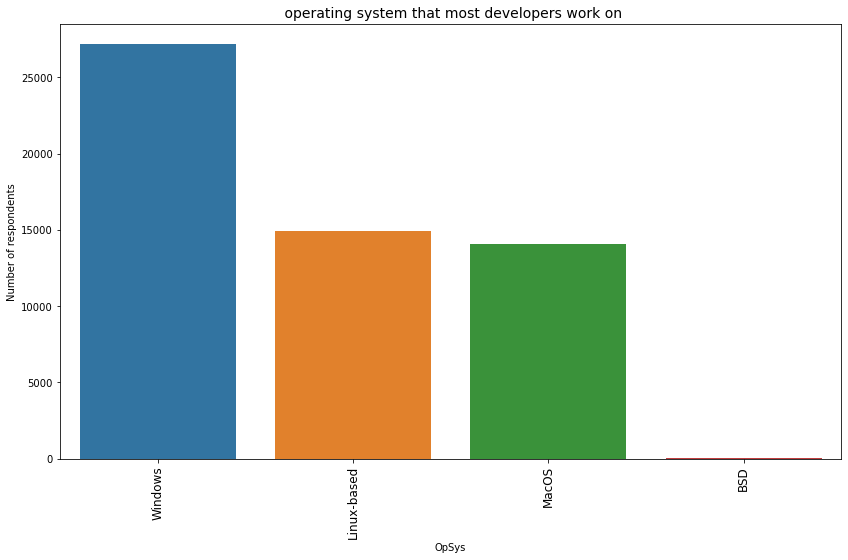

In [33]:
plot_stats('OpSys',' operating system that most developers work on')

Almost half of the respondents use Windows as their primary operating system. The rest were almost evenly split between MacOS and a flavor of Linux.


### Q9 : PlatformWorkedWith : The platforms that have been extensive development work during the past year, and which of them do you want to work during the next year?

###  Analyze data

In [34]:
data_df['PlatformWorkedWith'].unique()

array(['Windows', 'iOS', nan, ...,
       'Android;Google Cloud Platform;Heroku;iOS;Linux;MacOS',
       'Android;Arduino;Docker;Google Cloud Platform;Heroku;iOS;Kubernetes;Linux;MacOS;Raspberry Pi;Windows',
       'AWS;Google Cloud Platform;Heroku;iOS;Linux;MacOS;Microsoft Azure;WordPress'],
      dtype=object)

In [35]:
PlatformWorkedWith_vals = data_df.PlatformWorkedWith.value_counts()#Provide a pandas series of the counts for each PlatformWorkedWith status

PlatformWorkedWith_vals[:10] # assure this looks right

Windows                    4770
Linux;Windows              2461
Linux                      2112
Android                    1201
Microsoft Azure;Windows     996
Docker;Linux                922
Android;Windows             757
Docker;Linux;Windows        650
AWS;Docker;Linux            493
Android;Linux;Windows       478
Name: PlatformWorkedWith, dtype: int64

###  Visualize Data

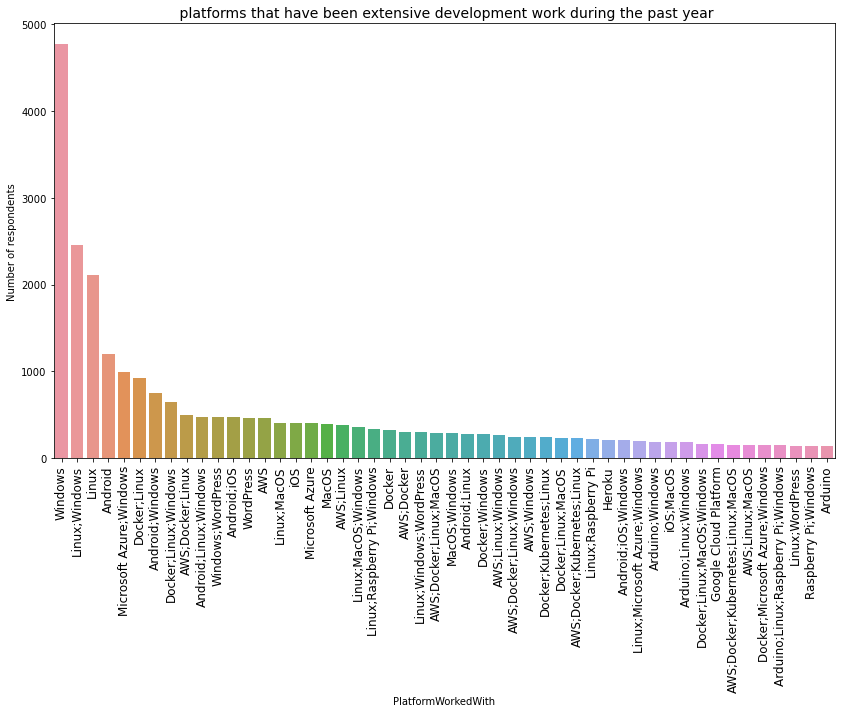

In [36]:
plot_stats('PlatformWorkedWith',' platforms that have been extensive development work during the past year')

###  Visualize Data

In [37]:
PlatformWorkedWith_possible_vals = ['Linux','Windows','Docker','AWS','Android','Raspberry Pi','MacOS','Microsoft Azure','Google Cloud Platform',
                 'iOS','Kubernetes','Heroku','Arduino','Slack Apps and Integrations','IBM Cloud or Watson']

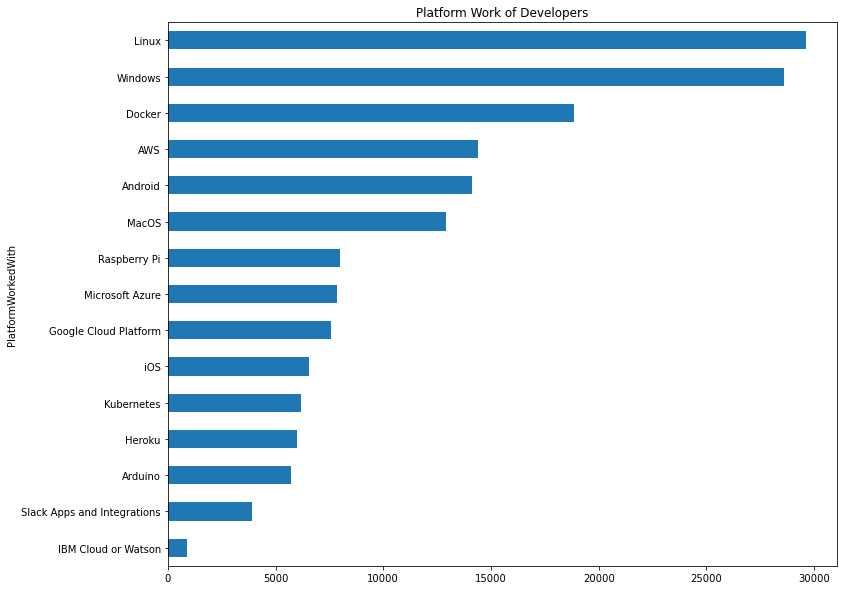

In [38]:
def clean_and_plot(data_df, title='Platform Work of Developers', plot=True):
    '''
    INPUT 
        df - a dataframe holding the PlatformWorked DeveloperType column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_PlatformWorked - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study_PlatformWorked = data_df['PlatformWorkedWith'].value_counts().reset_index()
    study_PlatformWorked.rename(columns={'index': 'PlatformWorkedWith', 'PlatformWorkedWith': 'count'}, inplace=True)
    study_df_PlatformWorked = total_count(study_PlatformWorked, 'PlatformWorkedWith', 'count', PlatformWorkedWith_possible_vals)

    study_df_PlatformWorked.set_index('PlatformWorkedWith', inplace=True)
    
    if plot:
        study_df_PlatformWorked.sort_values('count',ascending=True,inplace=True)
        study_df_PlatformWorked.plot(kind='barh',figsize = (12,10),fontsize = 10,legend=None);
        plt.title(title);
        plt.show()
    return study_df_PlatformWorked
    
props_df = clean_and_plot(data_df)

Linux and windows remains the most loved platform. Container technologies Docker and AWS rank as the second and third most loved. They are also among the platforms that developers most want to learn, which demonstrates how beloved they are.

###  Analyze data

In [39]:
study_PlatformWorkedWith = data_df['PlatformWorkedWith'].value_counts().reset_index()
study_PlatformWorkedWith.rename(columns={'index': 'PlatformWorkedWith', 'PlatformWorkedWith': 'count'}, inplace=True)
study_df_PlatformWorkedWith = total_count(study_PlatformWorkedWith, 'PlatformWorkedWith', 'count', PlatformWorkedWith_possible_vals)
study_df_PlatformWorkedWith['prec'] = study_df_PlatformWorkedWith['count']/np.sum(study_df_PlatformWorkedWith['count'])
study_df_PlatformWorkedWith

,PlatformWorkedWith,count,prec
0,Linux,29600,0.173032
1,Windows,28595,0.167157
2,Docker,18851,0.110197
3,AWS,14389,0.084113
4,Android,14101,0.082430
6,MacOS,12898,0.075397
5,Raspberry Pi,8010,0.046824
7,Microsoft Azure,7830,0.045772
8,Google Cloud Platform,7569,0.044246
9,iOS,6562,0.038359


### Q10: LanguageWorkedWith : What are the programming, scripting and coding languages of choice?

###  Analyze data

In [40]:
data_df['LanguageWorkedWith'].unique()

array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

In [41]:
LanguageWorkedWith_vals = data_df.LanguageWorkedWith.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith status

LanguageWorkedWith_vals[:20] # assure this looks right

HTML/CSS;JavaScript;PHP;SQL                                    1073
HTML/CSS;JavaScript                                             900
C#;HTML/CSS;JavaScript;SQL                                      856
C#;HTML/CSS;JavaScript;SQL;TypeScript                           754
HTML/CSS;JavaScript;TypeScript                                  697
Python                                                          651
Java                                                            575
HTML/CSS;JavaScript;PHP                                         525
C#                                                              416
HTML/CSS;Java;JavaScript;SQL                                    391
JavaScript                                                      344
HTML/CSS;JavaScript;Python                                      334
Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;SQL;TypeScript     328
C#;SQL                                                          304
HTML/CSS;Java;JavaScript                        

###  Visualize Data

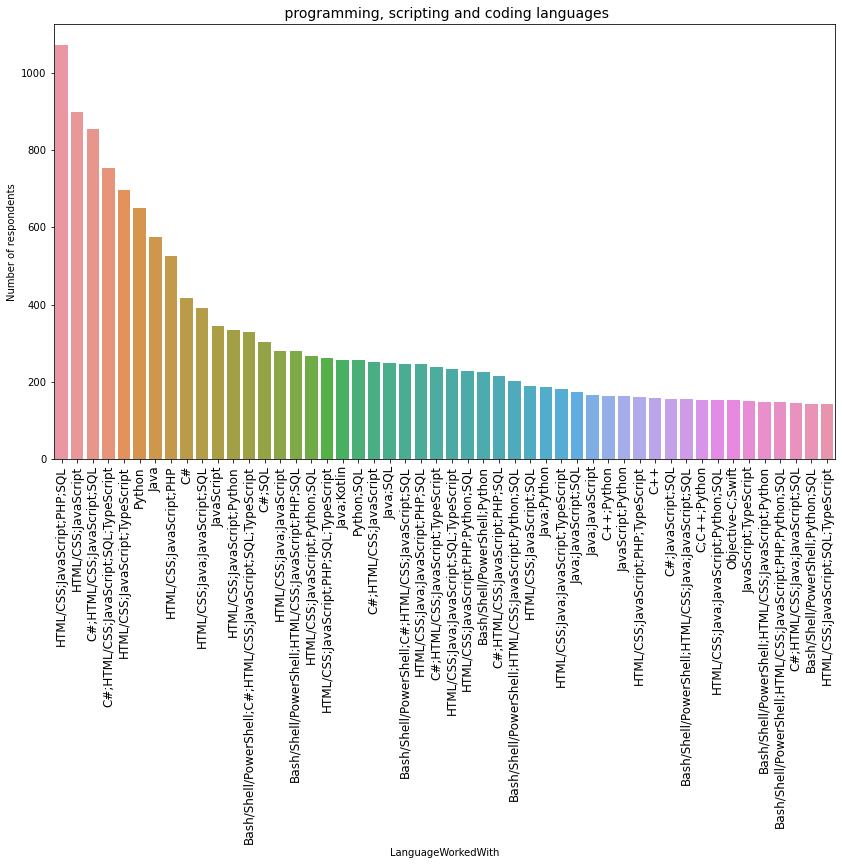

In [42]:
plot_stats('LanguageWorkedWith',' programming, scripting and coding languages')

There are just so, so many programming languages. And when you don't know much, which is very usual at the start, this can be very overwhelming. So let's take a look at what different developers from around the world use. That should give us an idea of what laguagues are important for what fields.

###  Analyze data

In [43]:
# We have to split the LanguageWorkedWith to get a proper picture
languages = data_df[data_df['LanguageWorkedWith'].notnull()]

unique_languages = {}

# split the languages on ;
for language_set in languages['LanguageWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

In [44]:
unique_languages

{'C#': 18041,
 'HTML/CSS': 36181,
 'JavaScript': 38822,
 'Swift': 3397,
 'Objective-C': 2340,
 'Python': 25287,
 'Ruby': 4046,
 'SQL': 31413,
 'Java': 23074,
 'PHP': 15007,
 'C': 12487,
 'TypeScript': 14578,
 'Bash/Shell/PowerShell': 18980,
 'Kotlin': 4468,
 'R': 3288,
 'VBA': 3499,
 'Perl': 1796,
 'Scala': 2052,
 'C++': 13707,
 'Go': 5038,
 'Haskell': 1222,
 'Rust': 2929,
 'Dart': 2280,
 'Julia': 519,
 'Assembly': 3553}

In [45]:
# develop a function that will be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,10), fontsize = 10, title = plot_title,legend=None);

###  Visualize Data

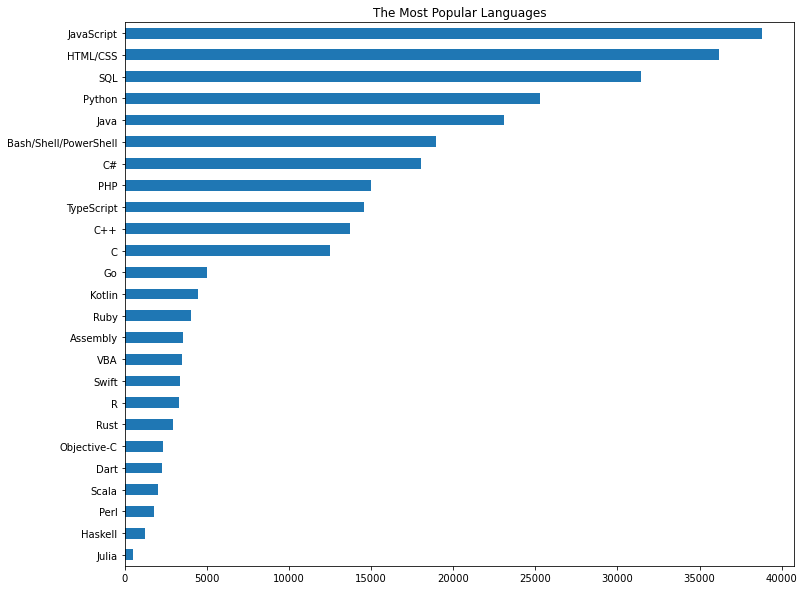

In [46]:
# let make a bar graph
plot_dimension_count(unique_languages,'The Most Popular Languages')

Unsurprisingly, for the eighth year in a row, JavaScript has maintained it's stronghold as the most commonly used programming language. Going further down the list, we also see moderate gains for TypeScript, edging out C in terms of popularity. Additionally, Ruby, once in the top 10 of this list as recently as 2017, has declined, being surpassed by newer, trendier technologies such as Go and Kotlin.

### Analyze data  using Bivariate Exploration

###  Analyze data and clean

In [47]:
# Show unique values in 'YearsCode' column
data_df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [48]:
data_df['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming': 'nonbinary', 
                        'Woman;Non-binary, genderqueer, or gender non-conforming': 'nonbinary',
                        'Woman;Man': 'both',
                        'Man;Non-binary, genderqueer, or gender non-conforming': 'nonbinary',
                        'Woman;Man;Non-binary, genderqueer, or gender non-conforming': 'nonbinary',}, inplace=True)

###  Visualize Data

In [49]:
def plot_heatmap_count(feature1, feature2, color, title):
    '''
    INPUT:
    feature1 and feature1 - the pandas dataframe you want to search and the column name you want to look through
    title) - the string the title of your plot
    color - The color disply the plot 
    
    OUTPUT:
       bar chart showing the total count for per dimension of interest
    '''
    
    tmp = data_df.groupby([feature1, feature2])['Country'].count()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, 'Country')
    fig, (ax1) = plt.subplots(ncols=1, figsize=(16,12))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()

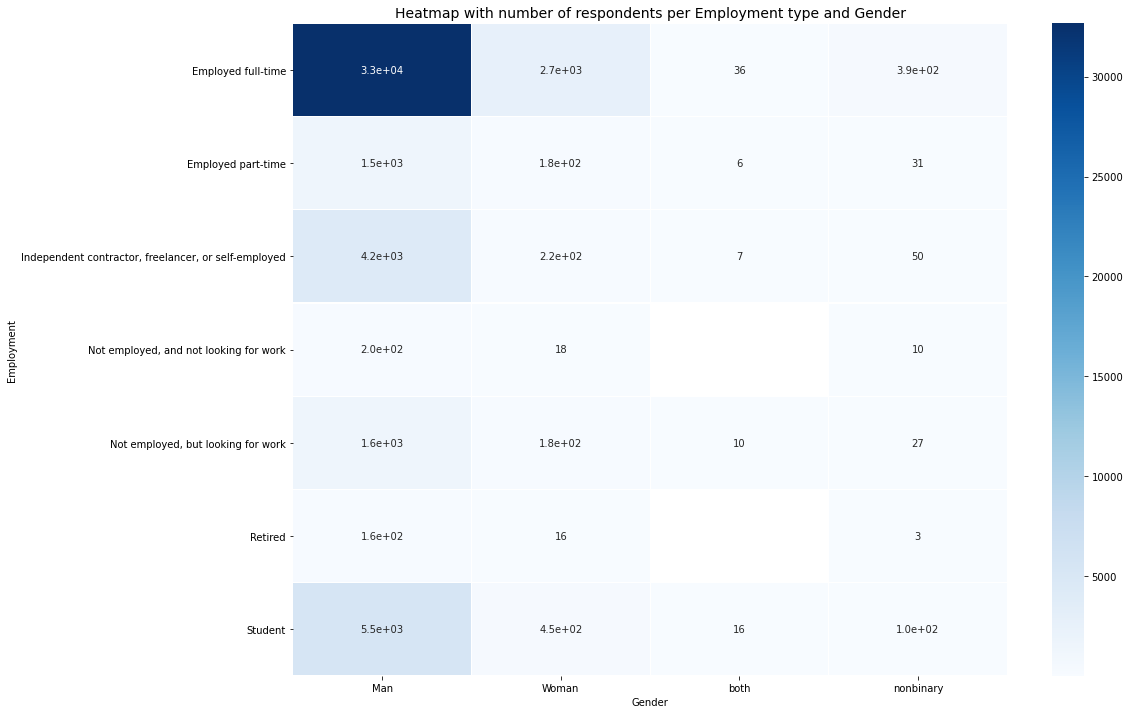

In [50]:
plot_heatmap_count('Employment', 'Gender',"Blues", "Heatmap with number of respondents per Employment type and Gender")

Over 70% of professional developers are employed at Employed full-time and 3.5% least part-time. Roughly 12% of all respondents say they are students.

###  Visualize Data

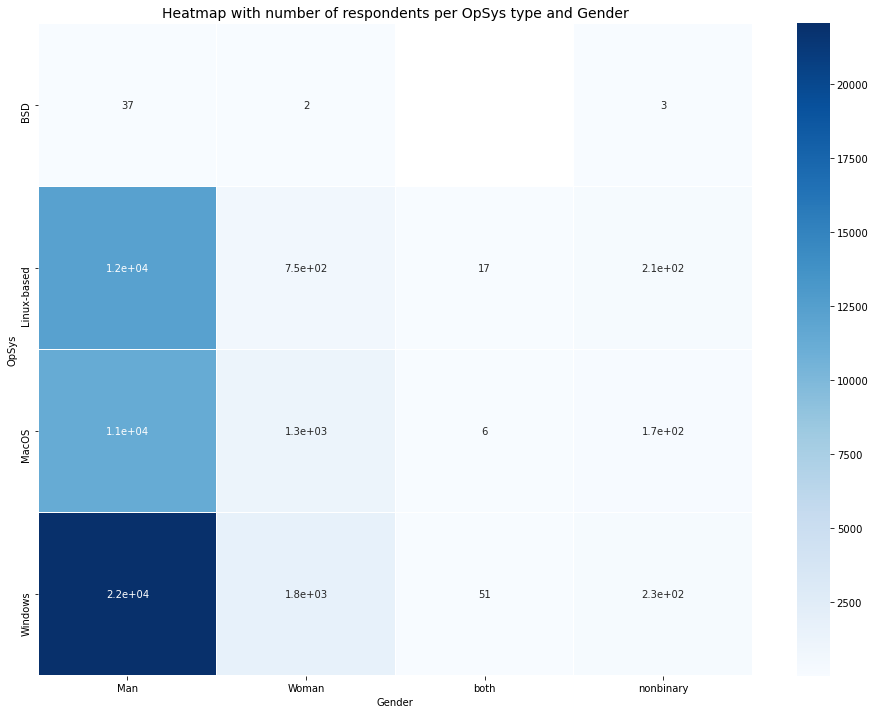

In [51]:
plot_heatmap_count('OpSys', 'Gender',"Blues", "Heatmap with number of respondents per OpSys type and Gender")

Almost half of the respondents use Windows  from man as their primary operating system. The rest were almost evenly split between MacOS and a flavor of Linux.

### Check number of categories data

In [52]:
# Inspect the number of categories per variable
data_df.nunique().sort_values(ascending=False)

Respondent                      64461
LanguageDesireNextYear          16243
LanguageWorkedWith              14256
DevType                          8269
PlatformDesireNextYear           7471
ConvertedComp                    6958
PlatformWorkedWith               6287
MiscTechDesireNextYear           5216
WebframeDesireNextYear           3986
WebframeWorkedWith               3789
DatabaseDesireNextYear           3193
CompTotal                        3003
DatabaseWorkedWith               2808
MiscTechWorkedWith               2730
NEWJobHunt                       2172
NEWCollabToolsDesireNextYear     1277
NEWCollabToolsWorkedWith         1153
NEWStuck                          444
JobFactors                        230
Ethnicity                         208
Country                           183
WorkWeekHrs                       157
CurrencyDesc                      142
CurrencySymbol                    141
Age                               110
NEWPurchaseResearch                63
NEWJobHuntRe

#### Data cleaning process for linear regression model: 2020 Stack Overflow Developer Survey

In [53]:
data_df.rename(columns={'MainBranch':'FullDeveloper'}, inplace=True)

In [54]:
data_df['FullDeveloper'].replace({'I am a developer by profession': 1, 'I am not primarily a developer, but I write code sometimes as part of my work': 0}, inplace=True)

In [55]:
data_df.rename(columns={'ConvertedComp':'Salary'}, inplace=True)

In [56]:
data_df['Gender'].replace({1: 'Man', 0:'Woman'}, inplace=True)             

In [57]:
data_df['Gender'].unique()

array(['Man', nan, 'Woman', 'nonbinary', 'both'], dtype=object)

In [58]:
data_df['Hobbyist'].replace({'Yes': 1, 'No': 0}, inplace=True)

#### Modify Variables with Numeric Data in Order to Change Data Type to Numeric

In [59]:
# Show unique values in 'YearsCode' column
data_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [60]:
data_df['YearsCode'].replace('Less than 1 year', 1, inplace=True)
data_df['YearsCode'].replace('More than 50 years', 50, inplace=True)

In [61]:
# Show unique values in 'YearsCodePro' column
data_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [62]:
data_df['YearsCodePro'].replace('Less than 1 year', 1, inplace=True)
data_df['YearsCodePro'].replace('More than 50 years', 50, inplace=True)

In [63]:
# # Show unique values in 'Age1stCode' column
data_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [64]:
# Replace strings with appropriate numeric values
data_df['Age1stCode'] = data_df['Age1stCode'].replace(['Younger than 5 years', 'Older than 85'], [4, 86])

In [65]:
# Recast the modified columns to numeric numeric data type
data_df[['YearsCode', 'YearsCodePro', 'Age1stCode']] = data_df[['YearsCode', 'YearsCodePro', 'Age1stCode']].apply(pd.to_numeric, axis=1, errors='coerce')

In [66]:
data_df.head(5)

,Respondent,FullDeveloper,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,Salary,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,1,1.0,NaN,13.0,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",White or of European descent,Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunities for professional development",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work with,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other physical activity;Do other work and come back later,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36.0,27.0
1,2,1,0.0,NaN,19.0,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who codes);Stack Exchange (public Q&A for a variety of topics);Stack Overflow Jobs (for job seekers),Visit Stack Overflow;Go for a walk or other physical activity,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7.0,4.0
2,3,I code primarily as a hobby,1.0,NaN,15.0,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4.0,NaN
3,4,1,1.0,25.0,18.0,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development,Slightly dissatisfied,"I’m not actively looking, but I am open to new 

Now take a look at the summary statistics associated with the quantitative variables in your dataset.

In [67]:
data_df.describe()

,Respondent,Hobbyist,Age,Age1stCode,CompTotal,Salary,WorkWeekHrs,YearsCode,YearsCodePro
count,64461.000000,64416.000000,45446.000000,57900.000000,3.482600e+04,3.475600e+04,41151.000000,57684.000000,46349.000000
mean,32554.079738,0.782228,30.834111,15.410345,3.190464e+242,1.037561e+05,40.782174,12.719697,8.537811
std,18967.442360,0.412735,9.585392,5.292925,inf,2.268853e+05,17.816383,9.691183,7.852753
min,1.000000,0.000000,1.000000,4.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,16116.000000,1.000000,24.000000,12.000000,2.000000e+04,2.464800e+04,40.000000,6.000000,3.000000
50%,32231.000000,1.000000,29.000000,15.000000,6.300000e+04,5.404900e+04,40.000000,10.000000,6.000000
75%,49142.000000,1.000000,35.000000,18.000000,1.250000e+05,9.500000e+04,44.000000,17.000000,12.000000
max,65639.000000,1.000000,279.000000,86.000000,1.111111e+247,2.000000e+06,475.000000,50.000000,50.000000


Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

###  Visualize Data

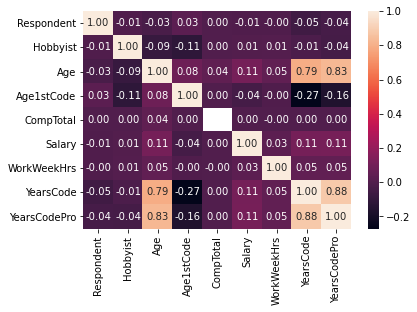

In [68]:
sns.heatmap(data_df.corr(), annot=True, fmt=".2f");

In general, you should try to be more careful with missing data in understanding the real world implications and reasons for why the missing values exist. At the same time, these solutions are very quick, and they enable you to get models off the ground. You can then iterate on your feature engineering to be more careful as time permits.

**1.** Using **fill_df**, predict Salary based on all of the other quantitative variables in the dataset.  You can use the template above to assist in fitting your model:

* Split the data into explanatory and response variables
* Split the data into train and test (using seed of 42 and test_size of .30 as above)
* Instantiate your linear model using normalized data
* Fit your model on the training data
* Predict using the test data
* Compute a score for your model fit on all the data, and show how many rows you predicted for

Use the tests to assure you completed the steps correctly.

In [69]:
#Only use quant variables and drop any rows with missing values
num_vars = data_df[['Salary','Hobbyist', 'Age', 'Age1stCode', 'CompTotal','WorkWeekHrs','YearsCode','YearsCodePro']]
df_dropna = num_vars.dropna(axis=0)

#Split into explanatory and response variables
X = df_dropna[['Hobbyist', 'Age', 'Age1stCode', 'CompTotal','WorkWeekHrs','YearsCode','YearsCodePro']]
y = df_dropna['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was -1.625811963574998e+33 on 8968 values.'

So, you now have seen how we can fit a model by dropping rows with missing values. This is great in that sklearn doesn't break! However, this means future observations will not obtain a prediction if they have missing values in any of the columns

In [70]:
drop_sal_df =num_vars.dropna(subset=['Salary'],axis=0) #Drop the rows with missing salaries

# test look
drop_sal_df.head()

,Salary,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
7,116000.0,1.0,36.0,12.0,116000.0,39.0,17.0,13.0
9,32315.0,1.0,22.0,14.0,25000.0,36.0,8.0,4.0
10,40070.0,1.0,23.0,13.0,31000.0,40.0,10.0,2.0
11,14268.0,0.0,49.0,42.0,1100.0,40.0,7.0,7.0
12,38916.0,1.0,53.0,14.0,3000.0,36.0,35.0,20.0


In [71]:
#Test Data
drop_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salary        34756 non-null  float64
 1   Hobbyist      34756 non-null  float64
 2   Age           30596 non-null  float64
 3   Age1stCode    34671 non-null  float64
 4   CompTotal     34756 non-null  float64
 5   WorkWeekHrs   33658 non-null  float64
 6   YearsCode     34630 non-null  float64
 7   YearsCodePro  34621 non-null  float64
dtypes: float64(8)
memory usage: 2.4 MB


Fill all missing values with the mean of the column and- store this in fill_df.

In [72]:
fill_mean =lambda col: col.fillna(col.mean()) #Mean function

fill_df=drop_sal_df.apply(fill_mean,axis=0)#Fill all missing values with the mean of the column.

# test look
fill_df.head()

,Salary,Hobbyist,Age,Age1stCode,CompTotal,WorkWeekHrs,YearsCode,YearsCodePro
7,116000.0,1.0,36.0,12.0,116000.0,39.0,17.0,13.0
9,32315.0,1.0,22.0,14.0,25000.0,36.0,8.0,4.0
10,40070.0,1.0,23.0,13.0,31000.0,40.0,10.0,2.0
11,14268.0,0.0,49.0,42.0,1100.0,40.0,7.0,7.0
12,38916.0,1.0,53.0,14.0,3000.0,36.0,35.0,20.0


In [73]:
# test data for the in fill_df
fill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Salary        34756 non-null  float64
 1   Hobbyist      34756 non-null  float64
 2   Age           34756 non-null  float64
 3   Age1stCode    34756 non-null  float64
 4   CompTotal     34756 non-null  float64
 5   WorkWeekHrs   34756 non-null  float64
 6   YearsCode     34756 non-null  float64
 7   YearsCodePro  34756 non-null  float64
dtypes: float64(8)
memory usage: 2.4 MB


In [74]:
#Split into explanatory and response variables
X = fill_df[['Hobbyist', 'Age', 'Age1stCode', 'CompTotal','WorkWeekHrs','YearsCode','YearsCodePro']]
y = fill_df['Salary']
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)    

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

print("The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test))

The r-squared score for your model was 0.016102912317136453 on 10427 values.


In [75]:
coeff_df = pd.DataFrame(lm_model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Hobbyist,3927.412353
Age,1079.926437
Age1stCode,-1159.937342
CompTotal,0.000000
WorkWeekHrs,316.202502
YearsCode,391.852332
YearsCodePro,1891.431101


In [76]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_preds})
df

,Actual,Predicted
15630,10992.0,96139.089088
19785,56723.0,111131.036830
27004,4668.0,80449.083502
6652,16344.0,85474.097370
13921,18612.0,120391.517660
...,...,...
31873,28584.0,119538.078959
55424,45312.0,126696.400480
57008,15564.0,122554.582276
7004,124800.0,88621.096371


In [77]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_preds)))
print("Explain variance score =", round(metrics.explained_variance_score(y_test, y_test_preds), 2)) 
print("R2 score =", round(metrics.r2_score(y_test, y_test_preds), 2))

Mean Absolute Error: 88612.60732003476
Mean Squared Error: 45231731786.17999
Root Mean Squared Error: 212677.5300453247
Explain variance score = 0.02
R2 score = 0.02


Remember, R-squared ranges from 0 to 1 and represents the amount of variation in the target variable explained by the variation in the predictor variables. The higher the r-squared, the higher the explanatory power of the model

From looking at the overall data and numerous visualizations, the features selected were not the best indicators of income. With such a low adjusted R^2 and a fairly high standard of error, we cannot explain the salary's variance with high confidence. The differences between the means of the features used on the model were surprisingly trivial. It seems like there are other factors that play into a developer's income.

Other features to look into for the future are industry type, company size, start up vs non-start up, and seniority in the company. These might have a bigger impact on a developer's income And looking at categorical variables and making a radical analysis and making a prediction